In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import mean_absolute_error
from datetime import datetime
import pydmd



In [23]:
df = pd.DataFrame()
matx = pd.read_csv("DATA/NSE50.csv",header=None) #VARIABLE 1
matx = pd.DataFrame(matx.transpose())
matx = matx.fillna(0)

In [24]:
def dmd_pred_plot(dmd,diff,d_ind) :    
    dmode = dmd.modes[:,d_ind].real

    plt.plot(diff)


    # Find the indices of the top 5 elements
    top_5_indices = np.argsort(dmode.real)[-5:]
    print("Top 5 indices :" ,top_5_indices)

    # Mark the indices on the plot
    plt.scatter(top_5_indices,diff[top_5_indices], color='red')

    plt.show()

In [34]:
j=33
df = []
i=25 # VARIABLE 3
  
def dmd_pred(j,i=25) :
    # creating the matrix mat 
    # i days are trained j th day from last 
    mat = matx.iloc[:, -(i+j):-j]
    mat=mat.to_numpy()

    #setting the test set 
    day0 = matx.iloc[:, -j-1]
    day1 = matx.iloc[:, -j]
    day2 = matx.iloc[:, -j+1]
    day3 = matx.iloc[:, -j+2]
    day4 = matx.iloc[:, -j+3]
    day5 = matx.iloc[:, -j+4]
    day6 = matx.iloc[:, -j+5]
    day7 = matx.iloc[:, -j+6]
    day8 = matx.iloc[:, -j+7]
    day9 = matx.iloc[:, -j+8]

    # dmd 
    dmd = pydmd.DMD(svd_rank=mat.shape[1])
    dmd.fit(mat)
    dmd.dmd_time['tend'] = dmd.dmd_time['tend'] + 9
    dmd.reconstructed_data.shape

    # prediction

    pred = dmd.reconstructed_data
    pday1 = np.real(pred[:,-9])
    pday2 = np.real(pred[:,-8])
    pday3 = np.real(pred[:,-7])
    pday4 = np.real(pred[:,-6])
    pday5 = np.real(pred[:,-5])
    pday6 = np.real(pred[:,-4])
    pday7 = np.real(pred[:,-3])
    pday8 = np.real(pred[:,-2])
    pday9 = np.real(pred[:,-1])

    # error
    # print("day1 : ",mean_absolute_error(day1,pday1))
    # print("day2 : ",mean_absolute_error(day2,pday2))
    # print("day3 : ",mean_absolute_error(day3,pday3))
    # print("day4 : ",mean_absolute_error(day4,pday4))
    # print("day5 : ",mean_absolute_error(day5,pday5))
    # print("day6 : ",mean_absolute_error(day6,pday6))
    # print("day7 : ",mean_absolute_error(day7,pday7))
    # print("day8 : ",mean_absolute_error(day8,pday8))
    # print("day9 : ",mean_absolute_error(day9,pday9)) 

    d_ind = np.argmax(np.abs(dmd.amplitudes.real))

    if np.amax(np.abs(dmd.amplitudes.real)) == np.abs(np.min(dmd.amplitudes.real))  :
        print("Not growing")
    print("eigs : " , dmd.eigs.real[d_ind])

    dmd_pred_plot(dmd,day3-day0,d_ind)



********-~  [DAY -  400 ] ~-********
eigs :  0.9940078799585597
Top 5 indices : [14  6 47 32 33]


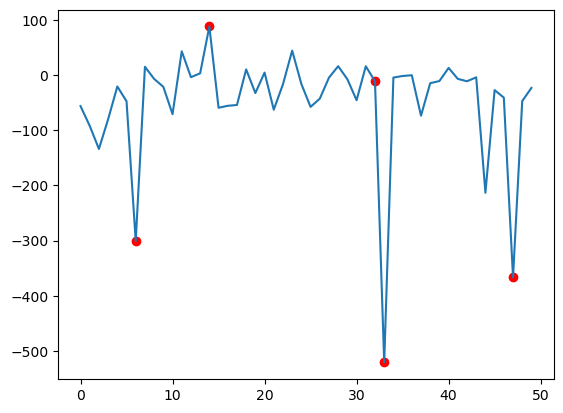

********-~  [DAY -  410 ] ~-********
Not growing
eigs :  0.9849148707468744
Top 5 indices : [36 12 34 35 43]


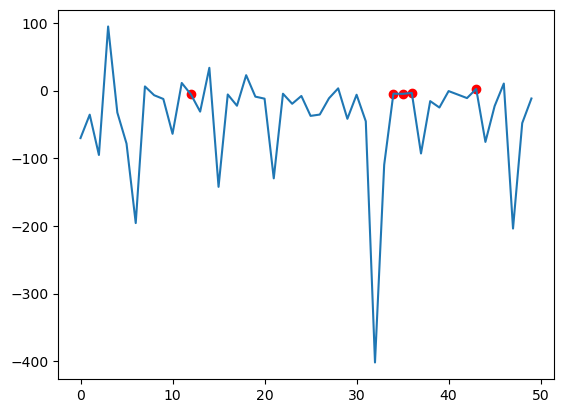

********-~  [DAY -  420 ] ~-********
eigs :  1.0207522693085231
Top 5 indices : [14  6 47 32 33]


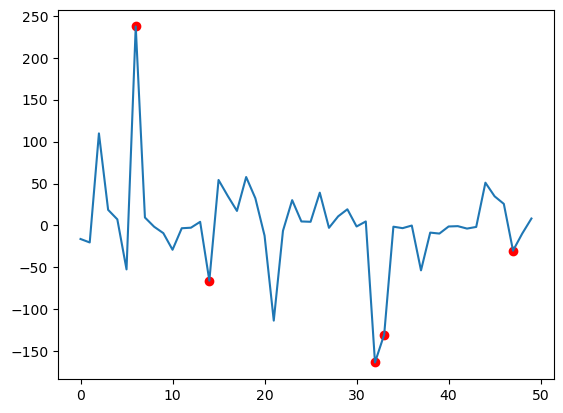

********-~  [DAY -  430 ] ~-********
Not growing
eigs :  1.0037955162337813
Top 5 indices : [36 12 35 34 43]


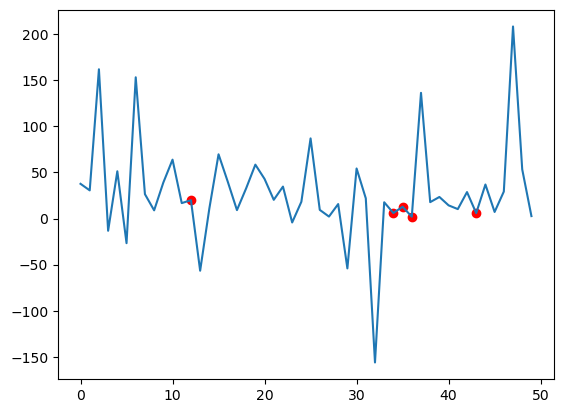

********-~  [DAY -  440 ] ~-********
eigs :  0.9891737026370475
Top 5 indices : [14  6 47 32 33]


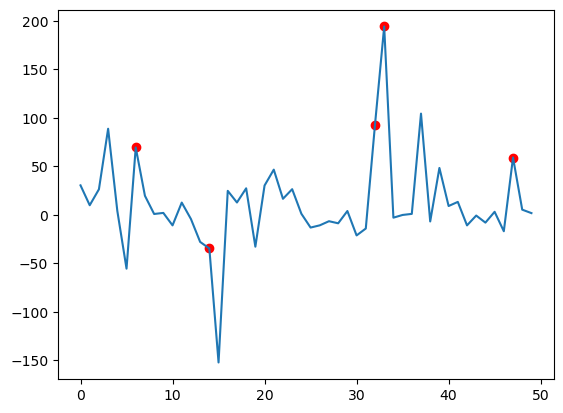

********-~  [DAY -  450 ] ~-********
eigs :  1.0158742703881107
Top 5 indices : [ 6 47 14 32 33]


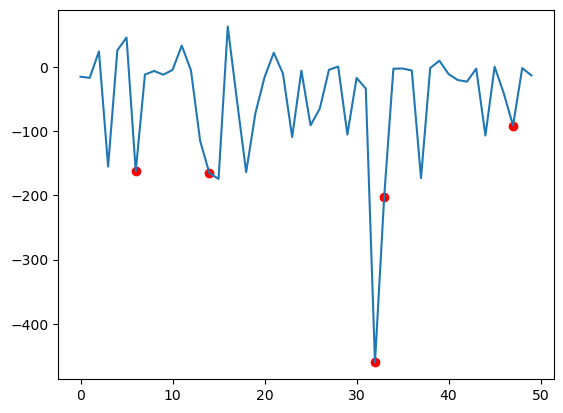

********-~  [DAY -  460 ] ~-********
Not growing
eigs :  1.0148264977609787
Top 5 indices : [36 12 35 34 43]


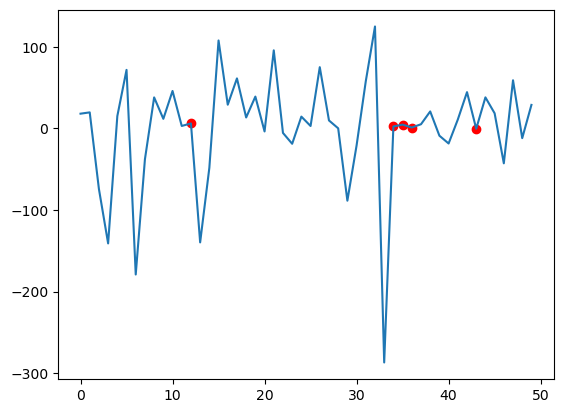

********-~  [DAY -  470 ] ~-********
Not growing
eigs :  0.9906128682728379
Top 5 indices : [36 12 34 35 43]


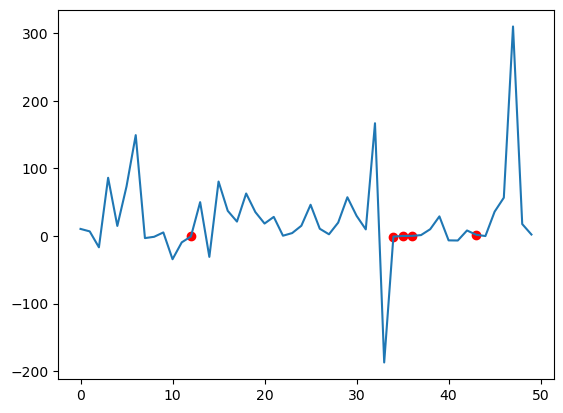

********-~  [DAY -  480 ] ~-********
eigs :  1.0134538193749727
Top 5 indices : [ 6 47 14 32 33]


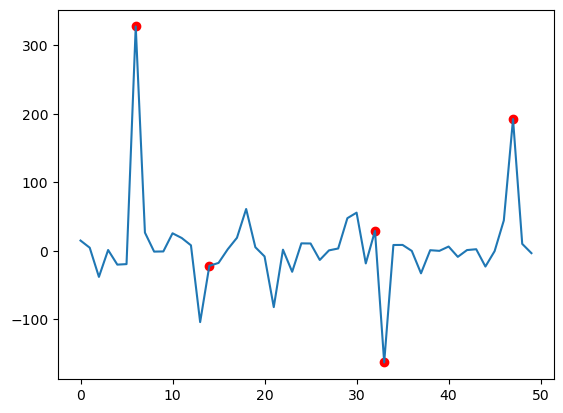

********-~  [DAY -  490 ] ~-********
eigs :  1.0022041925936187
Top 5 indices : [ 6 47 14 32 33]


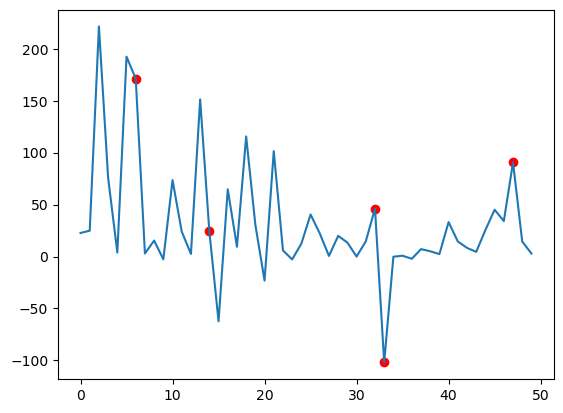

********-~  [DAY -  500 ] ~-********
Not growing
eigs :  1.0022244054886351
Top 5 indices : [36 12 34 35 43]


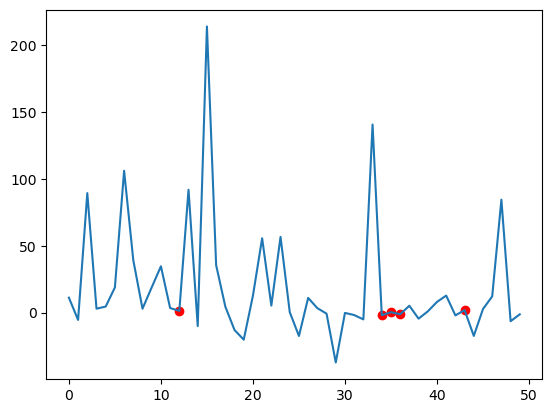

********-~  [DAY -  510 ] ~-********
eigs :  0.9857335355609957
Top 5 indices : [10 47 14 32 33]


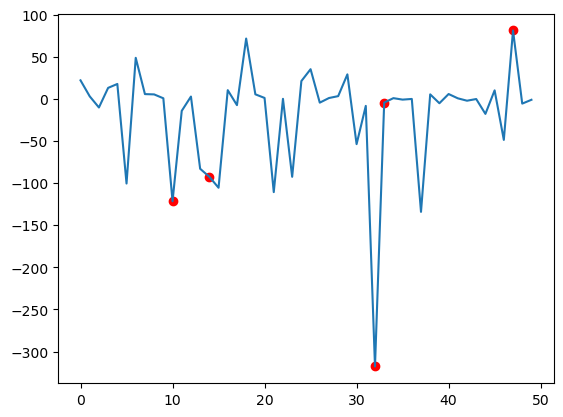

********-~  [DAY -  520 ] ~-********
eigs :  0.9822106928372005
Top 5 indices : [10  6 14 32 33]


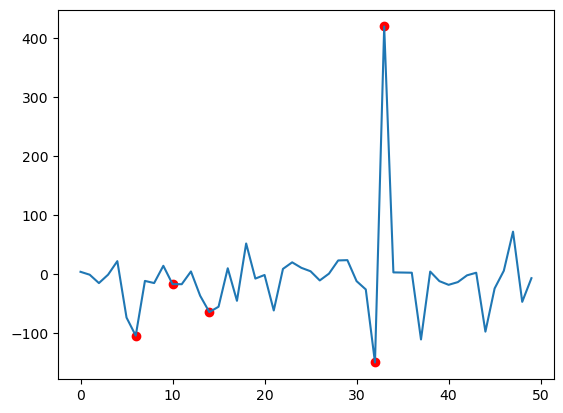

********-~  [DAY -  530 ] ~-********
eigs :  1.0125505233437593
Top 5 indices : [10 47 14 32 33]


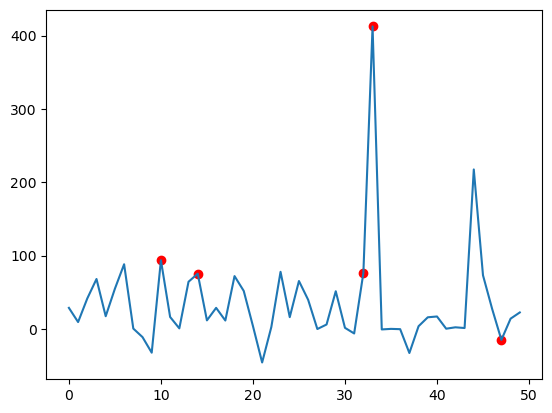

********-~  [DAY -  540 ] ~-********
Not growing
eigs :  1.0023957022881196
Top 5 indices : [36 12 34 35 43]


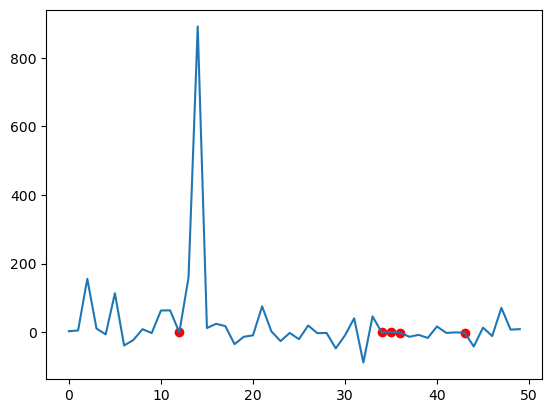

********-~  [DAY -  550 ] ~-********
Not growing
eigs :  0.9970769241239275
Top 5 indices : [12 36 34 35 43]


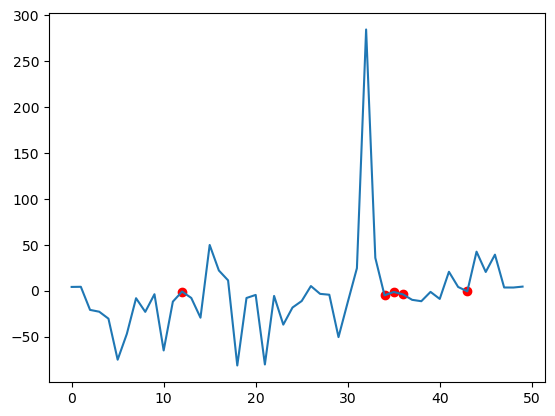

********-~  [DAY -  560 ] ~-********
eigs :  0.9698821035614119
Top 5 indices : [10 47 14 32 33]


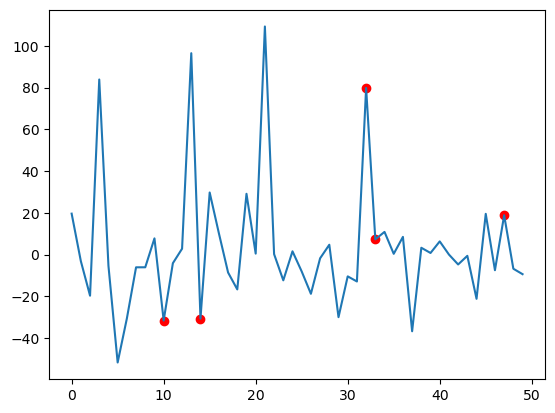

********-~  [DAY -  570 ] ~-********
Not growing
eigs :  1.0042817199700436
Top 5 indices : [12 42 34 35 43]


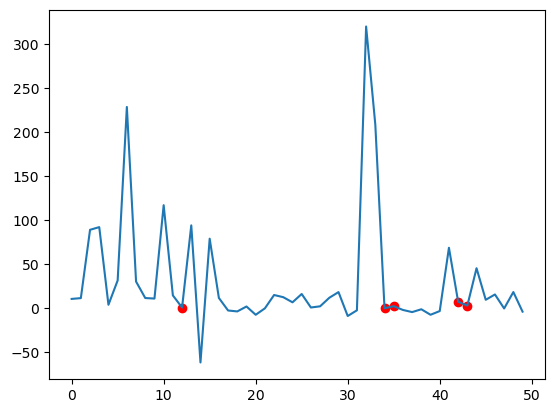

********-~  [DAY -  580 ] ~-********
eigs :  1.0057465116389603
Top 5 indices : [47 10 14 32 33]


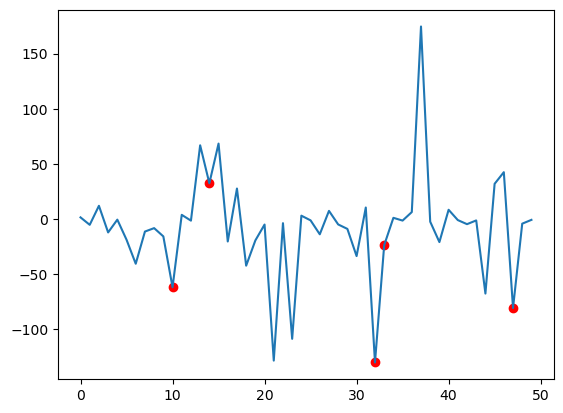

********-~  [DAY -  590 ] ~-********
Not growing
eigs :  0.9993663839085435
Top 5 indices : [36 42 34 35 43]


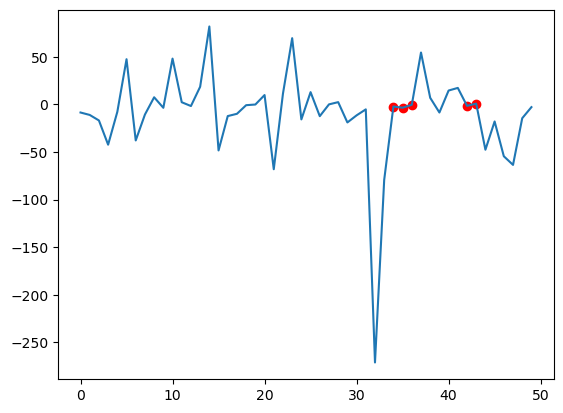

In [27]:
for k in range(400,600,10) :
    print("********-~  [DAY - ",k,"] ~-********")
    dmd_pred(k)